In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/robblatt/Project-3-Mod/raw/master/csv/unique_inspection.csv')

In [3]:
df_names = pd.DataFrame(
    {'DBA': df['DBA'],
     'CAMIS': df['CAMIS'],
    })

In [4]:
df_names.drop_duplicates(subset=['CAMIS'], keep = 'first', inplace = True)

In [5]:
df_name_count = df_names.groupby(['DBA']).count().sort_values(['CAMIS'], ascending=False)

In [6]:
df_name_count.reset_index(inplace = True)

In [7]:
df_name_count.rename(columns = {'CAMIS': 'restaurants'}, inplace = True)

In [8]:
df_ex = pd.merge(df, df_name_count, how='left', on='DBA')

In [9]:
df_ex['SCORE'].mean()

15.530966231555052

In [10]:
df_score = df_ex.groupby(['restaurants']).sum().sort_values(['SCORE'], ascending=False)

In [11]:
df_score.head(2)

,Unnamed: 0,CAMIS,ZIPCODE,SCORE,weather_binary
restaurants,,,,,
1,2895497037,2968360584293,678792169.0,1037030.0,27698
2,275204941,271935053332,61438678.0,92702.0,2542


In [12]:
df_count = df_ex.groupby(['restaurants']).count().sort_values(['SCORE'], ascending=False)

In [13]:
df_count = df_count.reset_index(inplace = False)

In [14]:
df_count = df_count[['restaurants', 'Unnamed: 0']]

In [15]:
df_count.rename(columns = {'Unnamed: 0' : 'count'}, inplace = True)

In [16]:
df_score_count = pd.merge(df_count, df_score, how='left', on='restaurants')

In [17]:
df_score_count['meany'] = df_score_count['SCORE'] / df_score_count['count']

In [18]:
df_score_count.head(2)

,restaurants,count,Unnamed: 0,CAMIS,ZIPCODE,SCORE,weather_binary,meany
0,1,64443,2895497037,2968360584293,678792169.0,1037030.0,27698,16.092206
1,2,5859,275204941,271935053332,61438678.0,92702.0,2542,15.822154


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
len(df_score_count.restaurants)

45

In [21]:
len(df_score_count.meany)

45

In [22]:
rest_mean = df_ex['SCORE'].mean()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


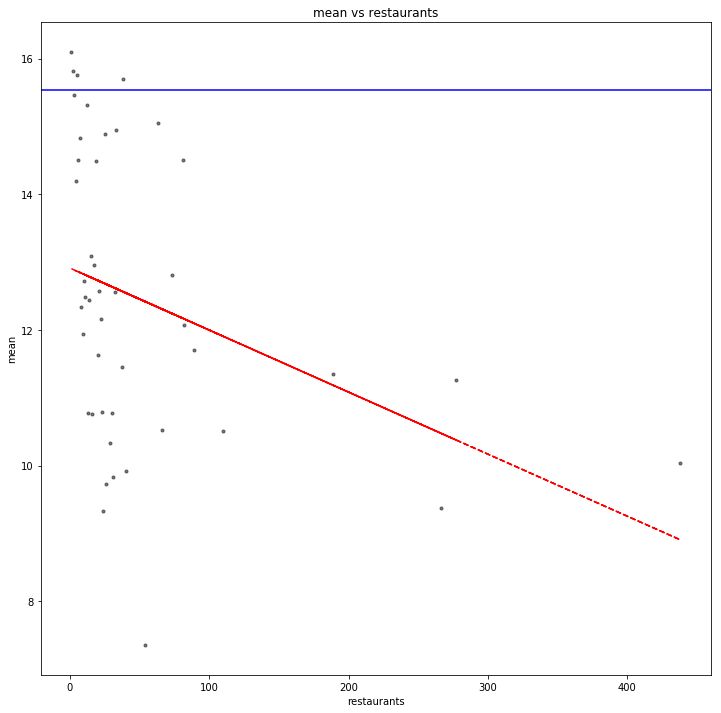

In [23]:
area = np.pi*3
colors = (0,0,0)
y = df_score_count.meany
x = df_score_count.restaurants

plt.figure(figsize=(12, 12))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.title('mean vs restaurants')
plt.xlabel('restaurants')
plt.ylabel('mean')

plt.axhline(df_ex['SCORE'].mean(), color='b')


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")


plt.show()


In [24]:
from scipy.stats import linregress
linregress(df_score_count['meany'], df_score_count['restaurants'])

LinregressResult(slope=-13.986080824722695, intercept=226.93800875658138, rvalue=-0.35749812511617146, pvalue=0.015910647053584154, stderr=5.571791497202854)

In [25]:
df_score_count.sort_values(['meany'], ascending=[True])

,restaurants,count,Unnamed: 0,CAMIS,ZIPCODE,SCORE,weather_binary,meany
35,54,117,4278756,5201301815,1172520.0,861.0,61,7.358974
43,24,60,380963,2474840786,633966.0,560.0,29,9.333333
7,266,676,14988674,28900738971,6818040.0,6343.0,322,9.383136
41,26,66,1414861,2787220875,680475.0,642.0,31,9.727273
28,31,154,6707196,6995831383,1598919.0,1514.0,79,9.831169
38,40,111,4411757,5109783276,1173055.0,1102.0,48,9.927928
3,438,1181,41089657,52298146522,12600727.0,11852.0,524,10.035563
29,29,148,6907174,6806266571,1623291.0,1529.0,57,10.331081
12,110,307,8605624,13176731587,3329681.0,3228.0,136,10.514658
23,66,181,6086805,8032081634,1849432.0,1906.0,73,10.530387


Text(0, 0.5, 'Frequency')

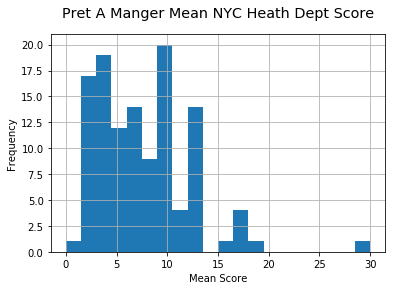

In [26]:
rest_name = 'PRET A MANGER'
bns = len(df[df['DBA'] == rest_name]) / 2
df[df['DBA'] == rest_name].hist(column='SCORE', bins = 20)
plt.title(rest_name.title() +' Mean NYC Heath Dept Score', x=0.5, y=1.05, ha='center', fontsize='x-large')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')

In [27]:
minus_pret = df_score_count[df_score_count['meany'] > 7.4]

In [28]:
from scipy.stats import linregress
linregress(minus_pret['restaurants'], minus_pret['meany'])

LinregressResult(slope=-0.009123677523955136, intercept=13.02674842554089, rvalue=-0.3823371977177391, pvalue=0.01042935792688957, stderr=0.0034023692912831887)

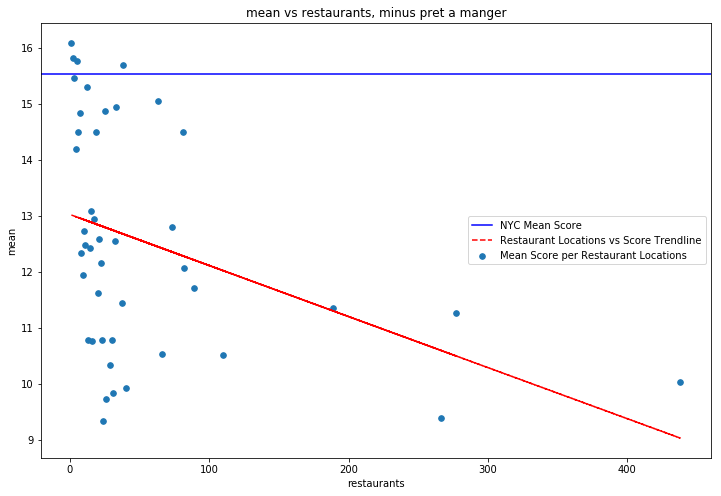

In [29]:
area = np.pi*10
colors = (0,0,0)
y = minus_pret.meany
x = minus_pret.restaurants

plt.figure(figsize=(12, 8))
means = plt.scatter(x, y, s=area, alpha=1)
plt.title('mean vs restaurants, minus pret a manger')
plt.xlabel('restaurants')
plt.ylabel('mean')

plt.axhline(df_ex['SCORE'].mean(), color='b')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.legend(('NYC Mean Score', 'Restaurant Locations vs Score Trendline', 'Mean Score per Restaurant Locations'))

plt.show()


In [30]:
df.head(5)

,Unnamed: 0,CAMIS,DBA,BORO,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
0,0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,18.0,NaN,NaN,Cycle Inspection / Initial Inspection,2019-05-16,1007 MORRIS PARK AVE,rain,Thursday,1
1,1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,7188924968,Bakery,5.0,A,05/11/2018,Cycle Inspection / Initial Inspection,2018-05-11,1007 MORRIS PARK AVE,rain,Friday,1
2,2,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,13.0,A,03/04/2019,Cycle Inspection / Initial Inspection,2019-03-04,469 FLATBUSH AVENUE,snow,Monday,1
3,3,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,12.0,A,03/13/2018,Cycle Inspection / Initial Inspection,2018-03-13,469 FLATBUSH AVENUE,snow,Tuesday,1
4,4,30112340,WENDY'S,BROOKLYN,11225.0,7182875005,Hamburgers,10.0,A,10/06/2017,Cycle Inspection / Re-inspection,2017-10-06,469 FLATBUSH AVENUE,rain,Friday,1


In [31]:
exex = df['DBA'].value_counts()

In [32]:
df_counts = pd.DataFrame(exex)

In [33]:
df_counts.reset_index(inplace=True)

In [34]:
rest_list = df_counts['index']

In [35]:
from matplotlib.pyplot import figure

In [36]:
import string

In [49]:
plt.rcParams["figure.figsize"] = (8,4)
def rest_hist(rest_name):
    meany = str(round(df[df['DBA'] == rest_name]['SCORE'].mean(), 2))
    bns = len(df[df['DBA'] == rest_name]) / 2
    df[df['DBA'] == rest_name].hist(column='SCORE', bins = 20)
    plt.title('There were ' + str(int(bns * 2)) + ' inspections of\n' + string.capwords(rest_name) +'. \nMean Score: ' + meany + '\nDates: 2017-06-01 – 2019-06-05', x=.75, y=.70, ha='center', 
              fontsize='large')
    plt.grid(color='xkcd:sky blue', alpha=0.3, which='major')
    plt.xlabel('Score')
    plt.ylabel('Number of inspections')
    plt.axvline(df[df['DBA'] == rest_name]['SCORE'].mean(), color='b')
    plt.axvline(df['SCORE'].mean(), color='y')

    plt.legend(('Restaurant Mean Score', 'NYC Mean Score', 'Inspections'), loc='right')

    plt.savefig('histograms/' + meany + ' '+ rest_name + '.png', dpi=80, pad_inches=4)

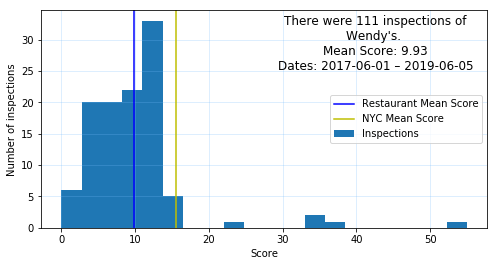

In [51]:
rest_hist("WENDY'S")

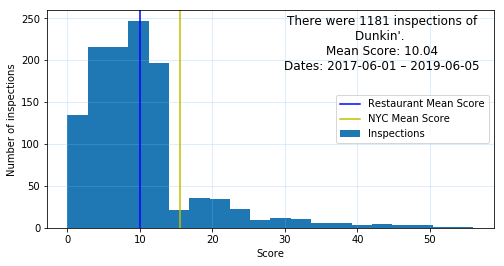

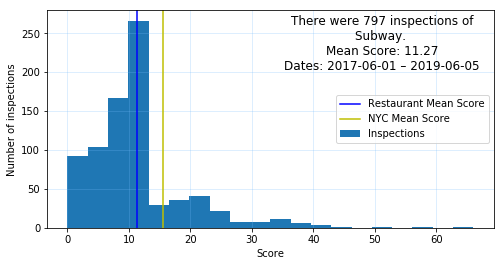

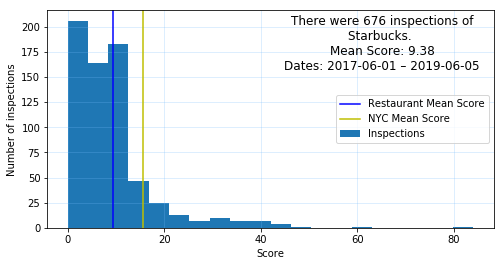

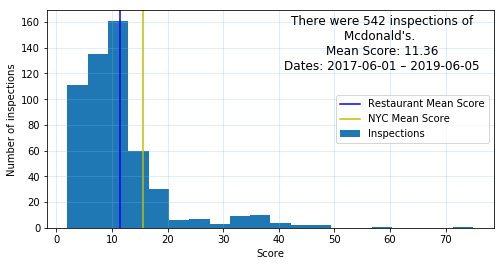

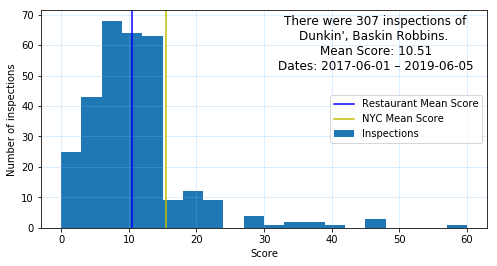

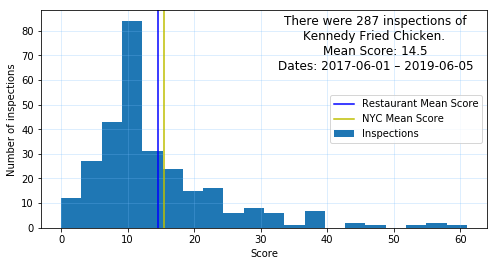

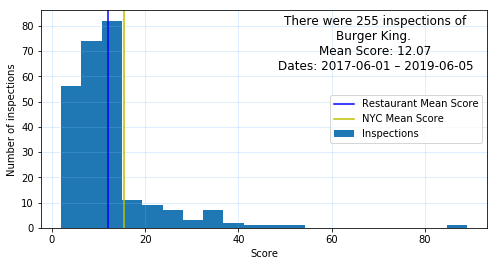

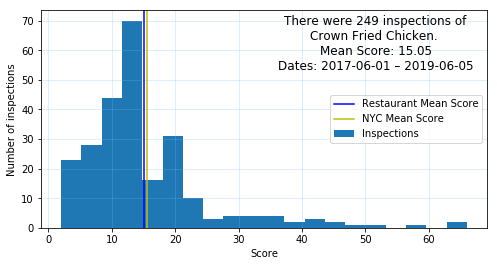

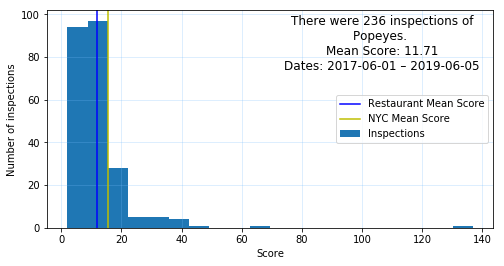

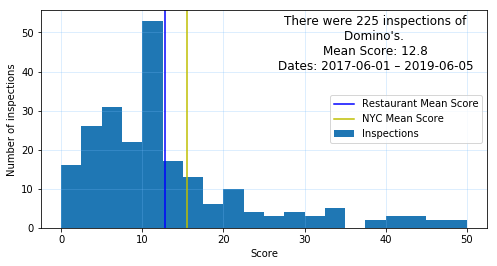

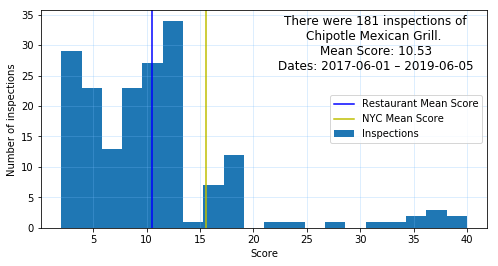

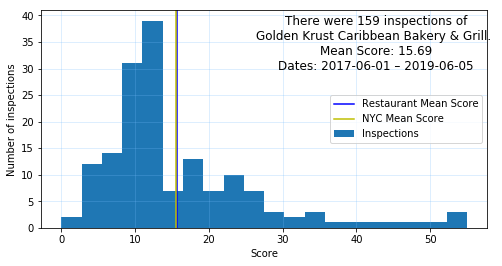

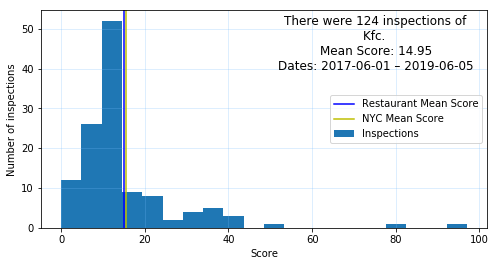

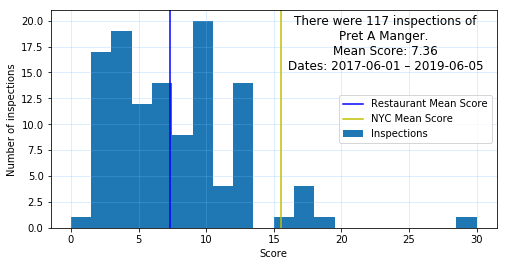

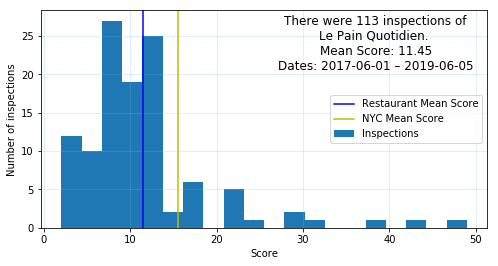

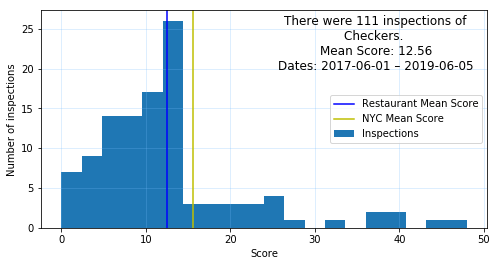

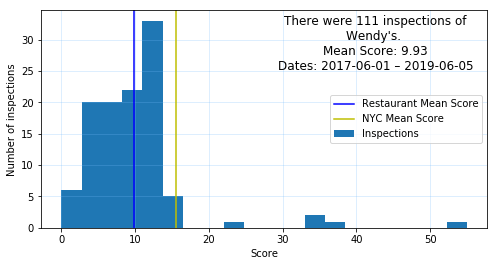

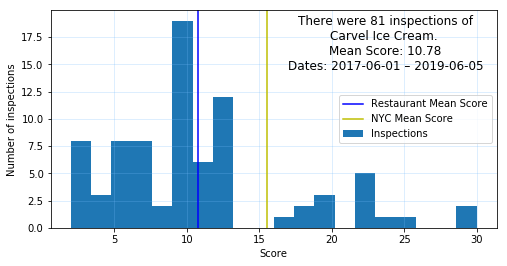

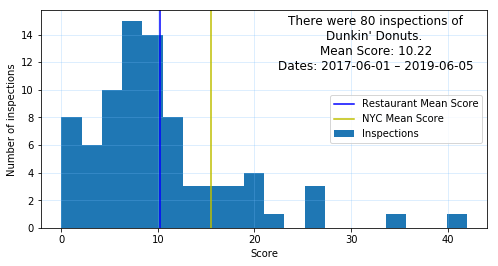

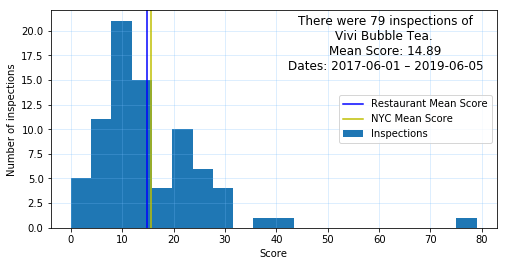

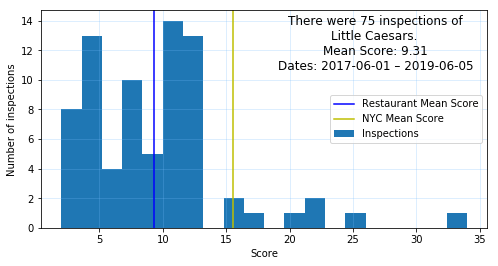

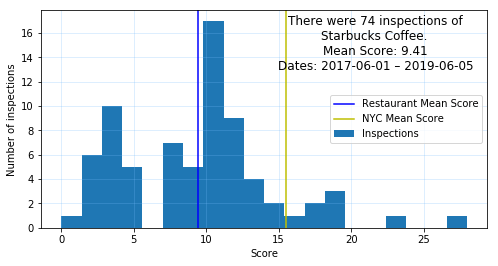

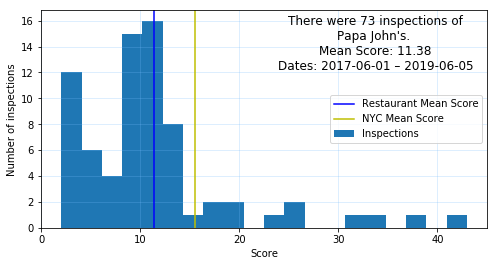

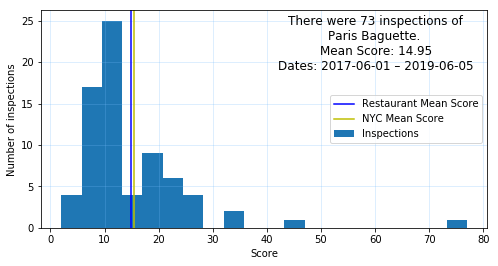

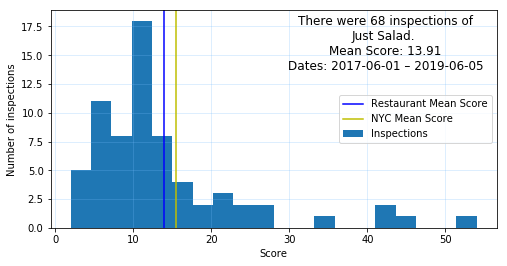

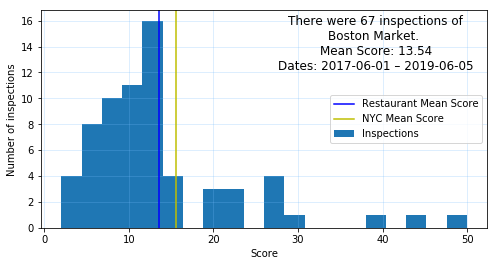

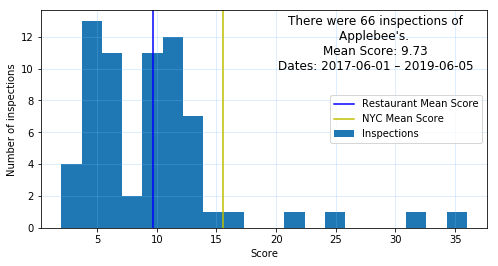

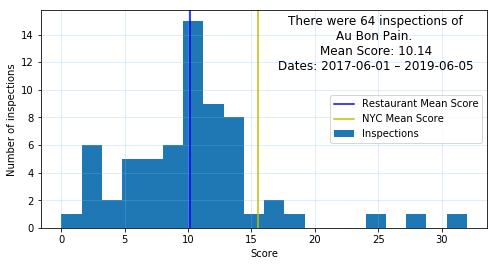

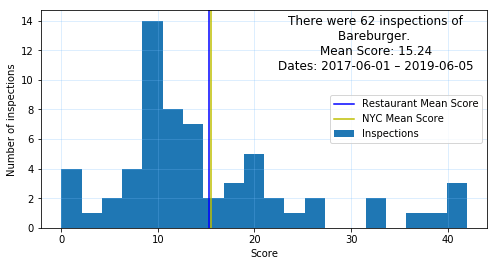

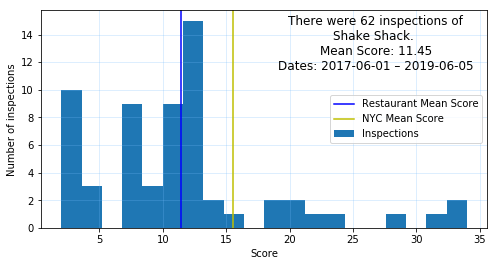

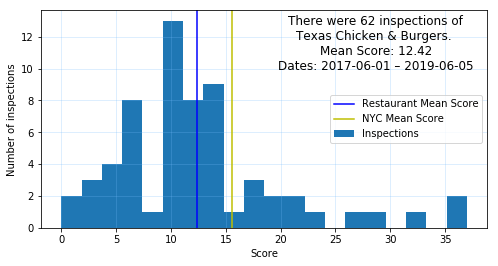

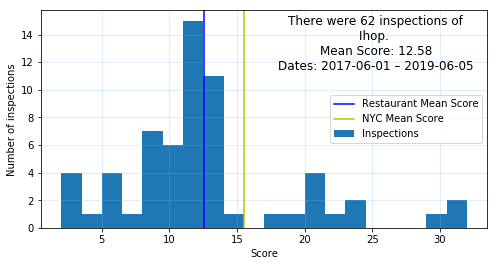

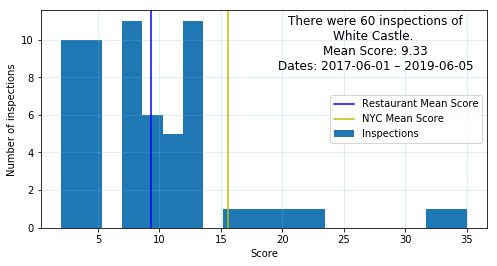

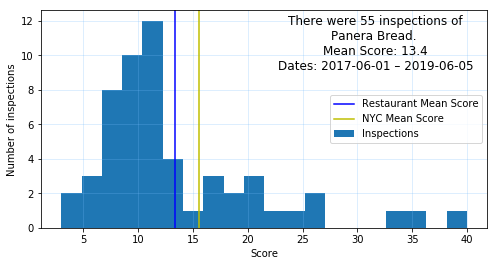

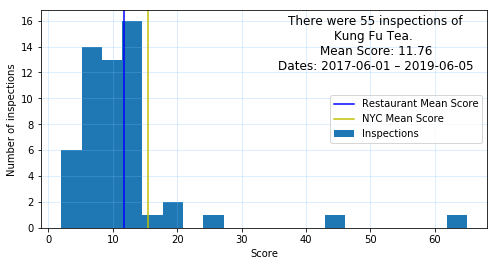

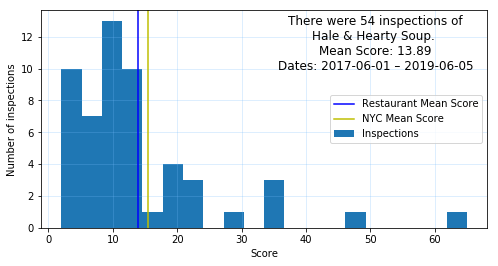

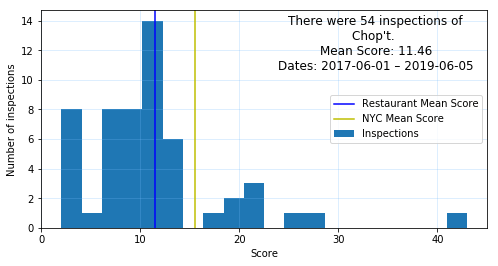

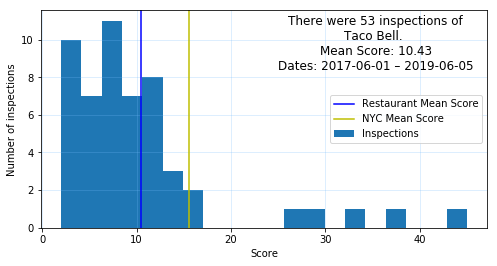

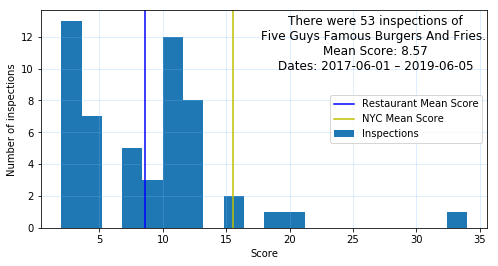

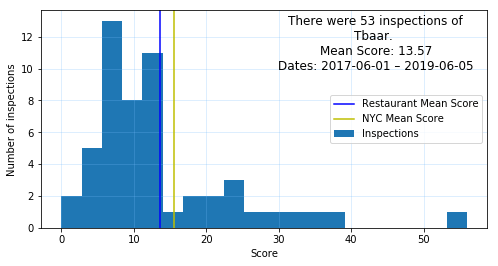

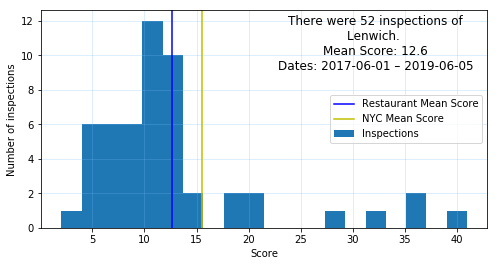

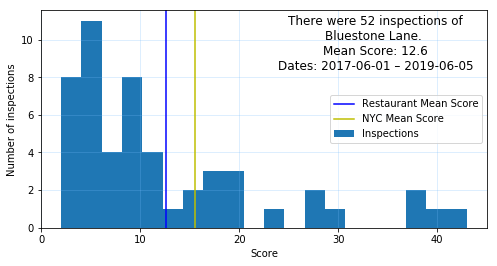

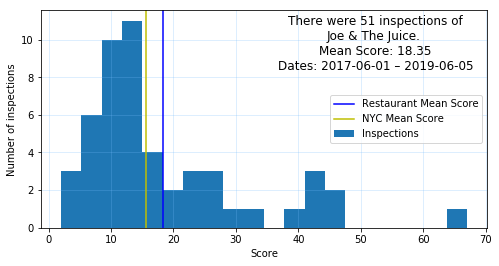

In [54]:
for i in range(len(rest_list)):
    if df_counts['DBA'][i] > 50:
        rest_hist(df_counts['index'][i])
    else:
        pass

In [47]:
minus_pret_ols = minus_pret[['restaurants', 'meany']]

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
formula = "meany ~ restaurants"
model = ols(formula= formula, data=minus_pret_ols).fit()
outcome = 'meany'
predictors = minus_pret_ols.drop('meany', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=minus_pret_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  meany   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     7.191
Date:                Tue, 11 Jun 2019   Prob (F-statistic):             0.0104
Time:                        11:52:01   Log-Likelihood:                -89.732
No. Observations:                  44   AIC:                             183.5
Df Residuals:                      42   BIC:                             187.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0267      0.339     38.413      